Here, we want to how level that the electric near field just above cell affected by adjacent cells. In this simulation, we simulated the structure which we called "Beta structure".

# Set up Structure for Cell height = 600 nm situation
Factors  
PML thickness : 1 micrometer

Cell height : 600 nm

Cell width : 150 nm

Substract thickness : 1 micrometer

Substract refractive index : 2.6678

symmetry along y direction

In [1]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt

#sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp * num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


In [2]:
# Set up period stucture
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )


     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


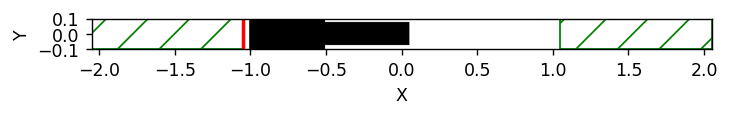

In [3]:

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()

In [4]:

t_xx = (.532) # Air 光速跑完 波長 532 nm 入射光 所需的 meep unit time
dt = (t_xx / 40) # cut 40 sections in a period time
t = 1000 # Total simulation time

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002 # Set up a x coordinate of observed point
y_obs = 0
print(int((t_xx)/dt))


40


-----------
Initializing structure...
time for choose_chunkdivision = 0.000174999 s
Working in 2D dimensions.
Computational cell is 4.1 x 0.2 x 0 with resolution 500
     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.187171 s
-----------
Meep progress: 2.435/1000.0 = 0.2% done in 4.0s, 1639.3s to go
on time step 2435 (time=2.435), 0.00164342 s/step
Meep progress: 5.009/1000.0 = 0.5% done in 8.0s, 1589.6s to go
on time step 5010 (time=5.01), 0.0015543 s/step
Meep progress: 7.617/1000.0 = 0.8% done in 12.0s, 1563.8s to go
on time step 7618 (time=7.618), 0.001534 s/step
Meep progress: 10.19/1000.0 = 1.0% done in 16.0s, 1554.6s to go
on time step 10192 (time=

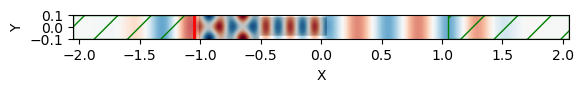

In [5]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim):
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez))

###
sim.run(mp.at_every(dt , get_slice) , until = t)  # # Make system record data every dt time duriing simulation.

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [6]:
ez_data_list = np.array(ez_data_list)
print(len(ez_data_list))
print(max(ez_data_list))
print(1 + int(round(t_xx/dt)))


76923
0.15768864032165167
41


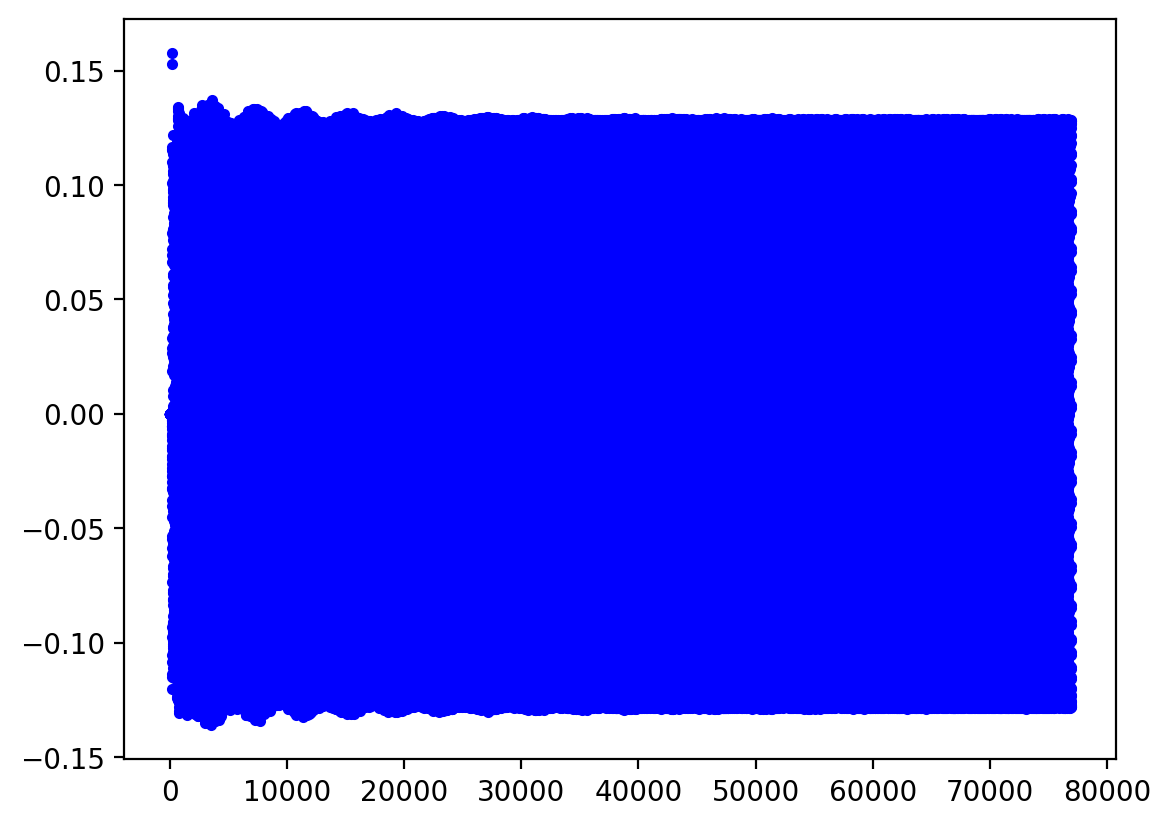

In [7]:
plt.figure(dpi = 200)
for i in range( round(len(ez_data_list) * 0 / t) , round(len(ez_data_list) * t / t)):
    plt.plot(i , ez_data_list[i] , 'b.')

In [8]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


0.1284388186568985 --------one period 內最大振福
0.12843966993315062 -------one next_period 內最大振福
-8.512762521284412e-07 -----振幅誤差
(array([49921]),) --- index1
(array([49960]),) --- index2
0.1284388186568985 	 0.12843966993315062 	 -8.512762521284412e-07 	 (array([49921]),) 	 (array([49960]),) 


到達誤差範圍內的所需 meep time unit 444.1194441194441 

0.1282234048023761


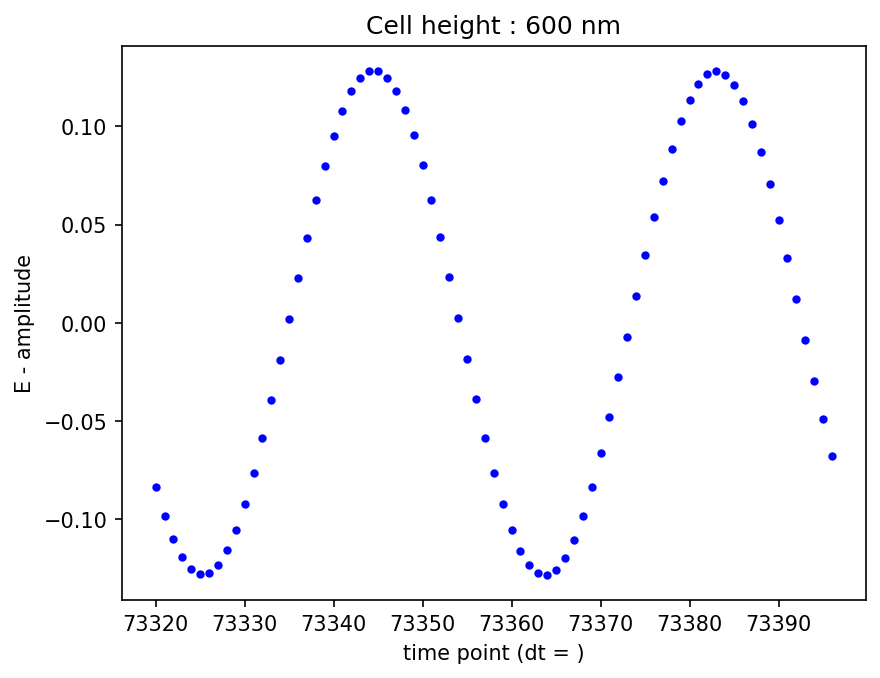

In [9]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        break

print('到達誤差範圍內的所需 meep time unit' ,  68326/ len(ez_data_list) * 500 , '\n')
dt_ = str(dt)
plt.figure(dpi = 150)
plt.title('Cell height : 600 nm')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)

# Phase for cell height = 600 nm

# --------------------------Cell height 300nm--------------------------------------

Next, we change cell height value from 600 nm to 300 nm , and we want to know what is effect by diffrent cell height.
Factors  
PML thickness : 1 micrometer

Cell height : 300 nm

Cell width : 150 nm

Substract thickness : 1 micrometer

Substract refractive index : 2.6678

y direction symmetry

In [10]:
sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.3  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 1  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp * num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)


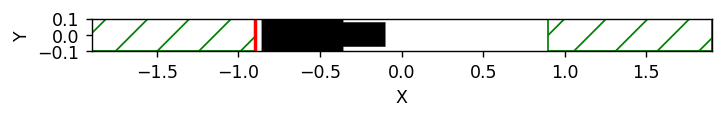

In [11]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * gp),
            ),
        )
    )

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()



In [12]:
t_xx = (.532) # Air 光速跑完 波長 532 nm 入射光 所需的 meep unit time
dt = (t_xx / 40) # cut 40 sections in a period time
t = 1000 # Total simulation time

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002  # Set up a x coordinate of observed point
y_obs_start = -0.5 * sy + gp/2  # Set up a y coordinate of observed point
y_obs = y_obs_start
print(int((t_xx)/dt))

40


-----------
Initializing structure...
time for choose_chunkdivision = 0.000218153 s
Working in 2D dimensions.
Computational cell is 3.8 x 0.2 x 0 with resolution 500
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.158706 s
-----------
Meep progress: 2.947/1000.0 = 0.3% done in 4.0s, 1353.5s to go
on time step 2947 (time=2.947), 0.00135755 s/step
Meep progress: 6.332/1000.0 = 0.6% done in 8.0s, 1255.6s to go
on time step 6332 (time=6.332), 0.00118169 s/step
Meep progress: 9.933/1000.0 = 1.0% done in 12.0s, 1196.2s to go
on time step 9935 (time=9.935), 0.00111047 s/step
Meep progress: 13.798/1000.0 = 1.4% done in 16.0s, 1143.7s to go
on time step 13802 (

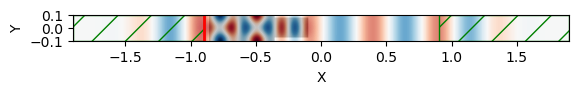

In [13]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
### ez_data_list = [[] for _ in range(int((t_xx)/dt))]
ez_data_list = []
###
def get_slice(sim):
    ez_data_list.append(sim.get_array(center = mp.Vector3(x_obs,y_obs) , size = mp.Vector3(0,0) , component = mp.Ez))

###
sim.run(mp.at_every(dt , get_slice) , until = t)


plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

76923
0.14300850991871578
0.13231224604147576
41


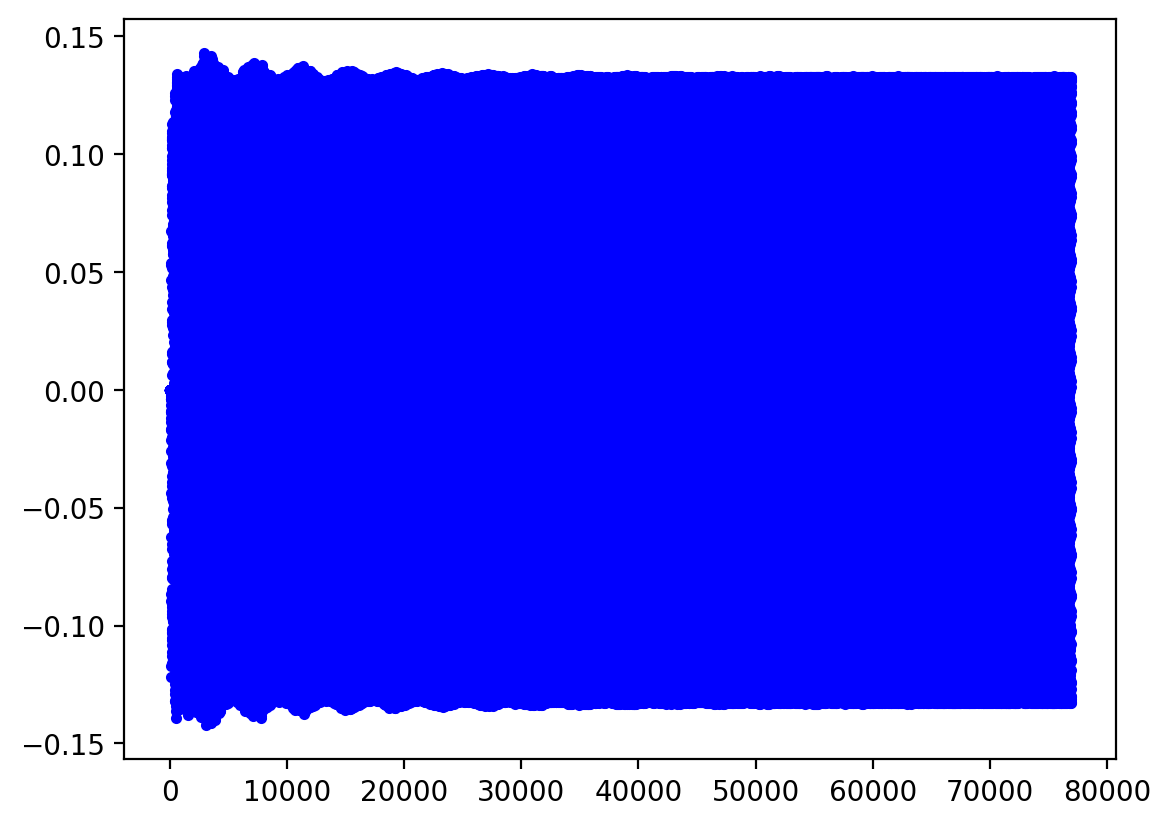

In [14]:
ez_data_list = np.array(ez_data_list)
ez_amplitude = np.abs(ez_data_list)
print(len(ez_amplitude))
print(max(ez_amplitude))
print(ez_amplitude[20000])
print(1 + int(round(t_xx/dt)))


plt.figure(dpi = 200)
for i in range( round(len(ez_amplitude) * 0 / t) , round(len(ez_amplitude) * t / t)):
    plt.plot(i , ez_data_list[i] , 'b.')

In [15]:
index1 = 0
index2 = 0

period_max = 0
period_next_max = 0

initial_index = round(len(ez_data_list) / t * 200 )
print(initial_index)
end_index = len(ez_data_list) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

15385
76841


0.1325064283107711 --------one period 內最大振福
0.13250638803413434 -------one next_period 內最大振福
4.0276636775749e-08 -----振幅誤差
(array([68326]),) --- index1
(array([68365]),) --- index2
0.1325064283107711 	 0.13250638803413434 	 4.0276636775749e-08 	 (array([68326]),) 	 (array([68365]),) 


到達誤差範圍內的所需 meep time unit 444.3729443729444 

0.13261745014030607


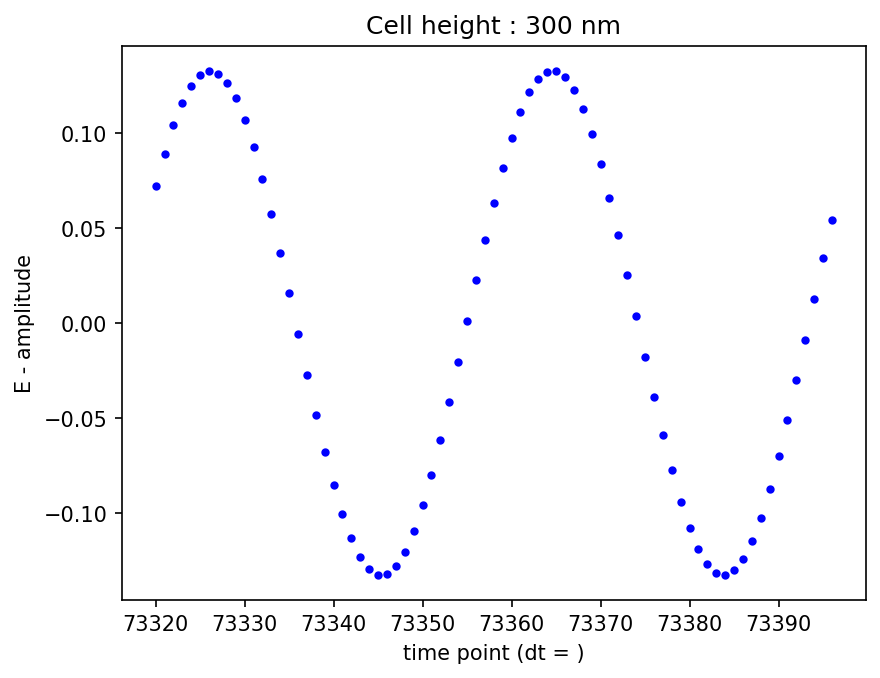

In [16]:
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_list[j])
        period_next.append(ez_data_list[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '--------one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_list == period_max)
        print(index1, '--- index1')
        index2 = np.where(ez_data_list == period_next_max)
        print(index2, '--- index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        break

print('到達誤差範圍內的所需 meep time unit' ,  68365/ len(ez_data_list) * 500 , '\n')
dt_ = str(dt)
plt.figure(dpi = 150)
plt.title('Cell height : 300 nm')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_list[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_list[i] , 'b.')
    if max_value < ez_data_list[i] :
        max_value = ez_data_list[i]

print(max_value)

In [21]:
'''# 儲存振福資訊的列表
ez_amplitude_list = [[] for _ in range(int(round(t/dt)))]

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy #+ gp/2
y_obs = y_obs_start

for i in range(int(round(t/dt))):
    for j in range(int(round(sy/0.002))):
        y_obs = y_obs_start + (j * 0.002)
        # 計算觀測點在陣列中的索引位置
        x_index = int(round(x_obs * sim.resolution))
        y_index = int(round(y_obs * sim.resolution))
        # 取得振幅資訊
        amplitude = np.abs(ez_data_list[i][0][x_index, y_index])
        # 將振幅資訊加入到對應時間步長的列表中
        ez_amplitude_list[i].append(amplitude)

    
for i in range(0, int((time_end - time_start) / dt)):
    print(ez_amplitude_list[i])
    
    '''

IndexError: list index out of range

In [17]:
'''
# 取得 Ez 場量在指定位置的相位資訊
phase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.01
y_obs_start = -0.5 * sy #+ gp/2 

# 儲存相位資訊的列表
phase_list = []

# 遍歷每個觀測點
for j in range(num_cells):
    y_obs = y_obs_start + (j * gp)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs) * sim.resolution))
    y_index = int(round((y_obs) * sim.resolution))
    # 取得相位資訊
    phase = np.angle(phase_data[x_index, y_index])
    phase_list.append(phase)

# 印出觀測點的相位資訊

for j, phase in enumerate(phase_list):
    print(f"觀測點 {j+1} 的相位資訊: {phase}")
print(phase_list)'''

[2.9956288798286947, 0.0, -2.9956288798288315]


# Animation

In [6]:
sim.reset_meep()
f = plt.figure(dpi = 100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 70)
plt.close()

filename = "3 beta beta beta structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video

Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 8.58307e-05 s
Working in 2D dimensions.
Computational cell is 17.1 x 0.6 x 0 with resolution 50
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.0242319 s
-----------


Meep: using complex fields.
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
Normalizing field data...
run 1 finished at t = 70.0 (7000 timesteps)
Generating MP4...
